In [19]:
from utils import *
import dimer_setup as dm
from SES_setup import *

plt.style.use('ggplot')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.5
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1.7
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics} ')
colours = ['#1E90FF', '#3CB371', '#FFA500', '#FF0000']


In [53]:
def load_and_plot(num, f):
    
    data_4LS_1 = load_obj('DATA/SES_validity_ss/4LS_wxx0_{}'.format(num))
    try:
        data_4LS_2 = load_obj('DATA/SES_validity_ss/4LS_wxx15_{}'.format(num))
        data_4LS_3 = load_obj('DATA/SES_validity_ss/4LS_wxx30_{}'.format(num))
    except:
        data_4LS_2 = None
        data_4LS_3 = None
    data_3LS = load_obj('DATA/SES_validity_ss/3LS_{}'.format(num))
    phonons = data_4LS_1['phonons']
    f(phonons, data_4LS_1, data_4LS_2, 
               data_4LS_3, data_3LS, num)

In [54]:
def plotting_SS(phonons, data_4LS_1, data_4LS_2, data_4LS_3, data_3LS, num):
    f, ((ax1, ax2),(ax3, ax4))  = plt.subplots(2, 2, sharex=True, figsize=(14,8))
    #f, (ax5, ax6)  = plt.subplots(2, 1, sharex=True, figsize=(12,6))
    phonons = phonons*1000/ev_to_inv_cm
    for label, data in zip([r'$\omega_{xx}=0meV$', r'$\omega_{xx}=15meV$', 
                            r'$\omega_{xx}=30meV$', '3LS'],
                           [data_4LS_1, data_4LS_2, data_4LS_3, data_3LS]):
        if type(data) == dict:
            rho_full = data['rho_nonadd']
            PARAMS = data['PARAMS']
        else:
            lens= [len(data[0]), len(data[1])]
            rho_full = data[np.argmax(lens)]
            PARAMS = data[2]
        # only going to plot full theories
        
        if label =='3LS':
            from SES_setup import make_expectation_operators
            ops = make_expectation_operators(PARAMS)
        else:
            from dimer_setup import make_expectation_operators
            ops = make_expectation_operators(PARAMS)
        #ax1.plot(phonons, [(r*ops['OO']).tr() for r in rho_rwa], label='RWA')
        print(len(rho_full))
        ls = 'solid'
        if label == '3LS':
            ls = 'dashed'
            label=None
        ax1.plot(phonons, [(r*ops['OO']).tr() for r in rho_full], label=label, ls=ls)
        #plt.xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
        ax1.set_ylabel(r"$\rho_{g}^{ss}$")
        ax1.set_xlim(phonons[0], phonons[-1])
        ax1.legend()

        #ax2.plot(phonons, [(r*ops['dark']).tr() for r in rho_rwa], label='RWA')
        ax2.plot(phonons, [(r*ops['dark']).tr() for r in rho_full], label=label, ls=ls)
        #ax2.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
        ax2.set_ylabel(r"$\rho_{-}^{ss}$")
        #ax2.legend()


        #ax3.plot(phonons, [(r*ops['bright']).tr() for r in rho_rwa], label='RWA')
        ax3.plot(phonons, [(r*ops['bright']).tr() for r in rho_full], label=label, ls=ls)
        ax3.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(meV)$")
        ax3.set_ylabel(r"$\rho_{+}^{ss}$")
        #ax3.legend()

        #ax4.plot(phonons, [(r*ops['eig_x']).tr() for r in rho_rwa], label='RWA')
        ax4.plot(phonons, np.abs(np.array([(r*ops['sigma_x']).tr() for r in rho_full])), label=label, ls=ls)
        ax4.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(meV)$")
        ax4.set_ylabel(r"$|\rho_{12}^{ss}|$")
        ax4.legend()
        plt.subplots_adjust(left=0.1, bottom=0.1, right=0.98, top=0.9, wspace=0.25, hspace=0.08)

    figname= "PLOTS/PAPER/3LS-4LS-comparison-{}.pdf".format(num)
    plt.savefig(figname)
    print(figname)

    plt.show()


35
35
35
35


/Users/henrymaguire/.pyenv/versions/3.7.0/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PLOTS/PAPER/3LS-4LS-comparison-1.pdf


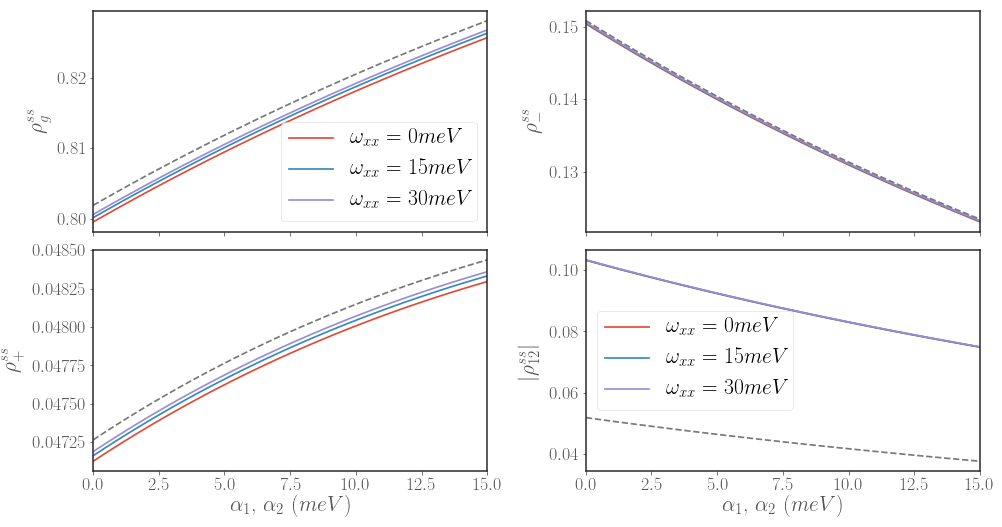

In [55]:
# Figure 1.3: run this 
load_and_plot(1, plotting_SS)

In [56]:
def plotting_SS_together(phonons, data_4LS, data_4LS_na1, data_4LS_na2, data_3LS, num):
    f, ax1  = plt.subplots(1, 1, figsize=(9,7))
    #f, (ax5, ax6)  = plt.subplots(2, 1, sharex=True, figsize=(12,6))
    phonons = phonons*1000/ev_to_inv_cm
    
    from dimer_setup import make_expectation_operators
    if type(data_4LS) == dict:
        rho_full = data_4LS['rho_nonadd']
        PARAMS = data_4LS['PARAMS']
    else:
        lens= [len(data_4LS[0]), len(data_4LS[1])]
        rho_full = data_4LS[np.argmax(lens)]
        PARAMS = data_4LS[2]
    ops = make_expectation_operators(PARAMS)
    print(len(phonons), len(rho_full))
    
    ax1.plot(phonons, [(r*ops['dark']).tr() for r in rho_full], 
                                                     label=r'$\rho_{--}$', color=colours[2])
    ax1.plot(phonons, [(r*ops['bright']).tr() for r in rho_full], 
                                                     label=r'$\rho_{++}$', color=colours[1])
    ax1.plot(phonons, [(r*ops['XX']).tr() for r in rho_full], 
                                                     label=r'$\rho_{XX}$', color=colours[0])
    from SES_setup import make_expectation_operators
    if type(data_3LS) == dict:
        rho_full = data_3LS['rho_nonadd']
        PARAMS = data_3LS['PARAMS']
        phonons = data_3LS['phonons']*1000/ev_to_inv_cm
    else:
        lens= [len(data_3LS[0]), len(data_3LS[1])]
        rho_full = data_3LS[np.argmax(lens)]
        PARAMS = data_3LS[2]
        
    print(data_3LS.keys())
    ops = make_expectation_operators(PARAMS)
    print(len(phonons), len(rho_full))
    #ax1.plot(phonons, [(r*ops['OO']).tr() for r in data_3LS['rho_nonadd']], 
    #                                                 linestyle='dashed', color=colours[0])
    
    ax1.plot(phonons, [(r*ops['dark']).tr() for r in rho_full], 
                                                     linestyle='dashed', color=colours[2], linewidth=2.8)
    ax1.plot(phonons, [(r*ops['bright']).tr() for r in rho_full], 
                                                     linestyle='dashed', color=colours[1], linewidth=2.8)
    
    #plt.xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
    ax1.set_ylabel(r"Population")
    ax1.set_xlim(phonons[0], phonons[-1])
    ax1.legend()
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.98, top=0.9, wspace=0.25, hspace=0.08)
    figname= "PLOTS/PAPER/3LS-4LS-together-{}.pdf".format(num)
    plt.xlabel(r"$\alpha_1$, $\alpha_2$ (meV)")
    plt.savefig(figname)
    print(figname)

    plt.show()

35 35
dict_keys(['rho_nonadd', 'op_list', 'phonons', 'PARAMS'])
35 35


/Users/henrymaguire/.pyenv/versions/3.7.0/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PLOTS/PAPER/3LS-4LS-together-1.pdf


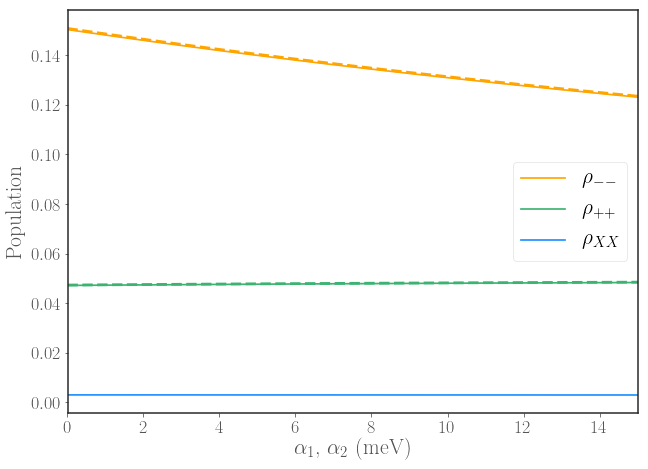

In [57]:
# Figure 1.4
load_and_plot(1, plotting_SS_together)

20 20
dict_keys(['rho_nonadd', 'op_list', 'phonons', 'PARAMS'])
20 20


/Users/henrymaguire/.pyenv/versions/3.7.0/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PLOTS/PAPER/3LS-4LS-together-2.pdf


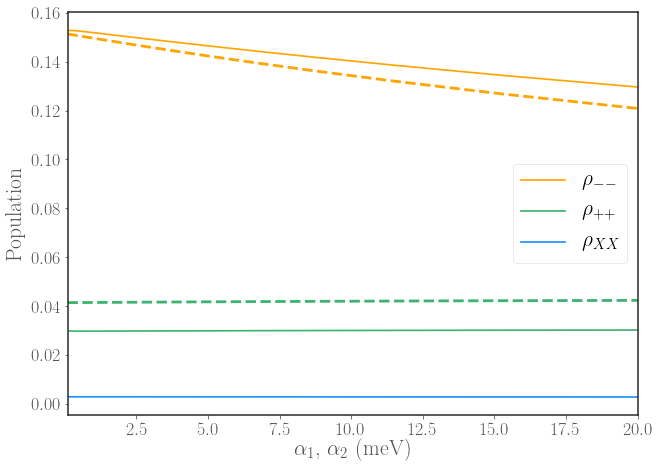

In [58]:
# Figure 1.4
load_and_plot(2, plotting_SS_together)

# Paper plot 27/02/2019
Constant differences are now visible for BS and DS populations and far more significant for DS, since the thermal energy is now on the same order as the excitonic gap.

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PLOTS/PAPER/3LS-4LS-comparison.pdf


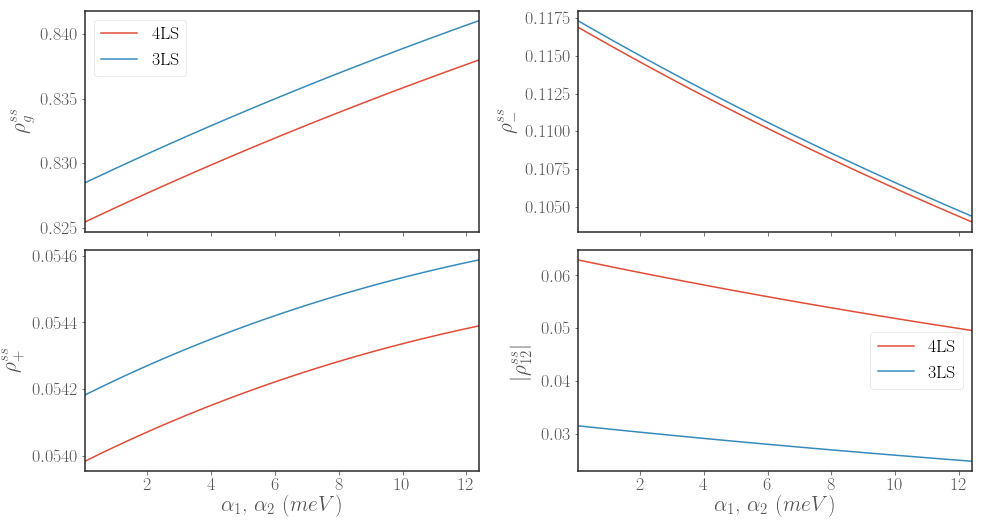

In [120]:
load_and_plot(1)

# larger $\omega_0$
We are seeing the exact same thing as smaller $\omega_0$, though slightly higher GS, BS and XX populations and smaller DS populations at stronger coupling. This might be due convergence, spectral density peak differences or thermal population/dissipation rate differences. Slightly more exciton coherence too.

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


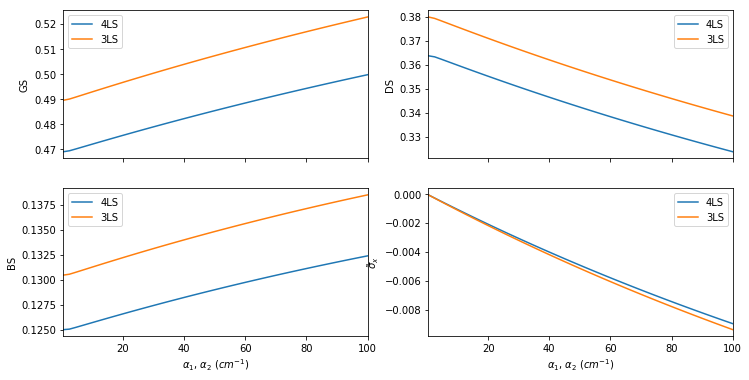

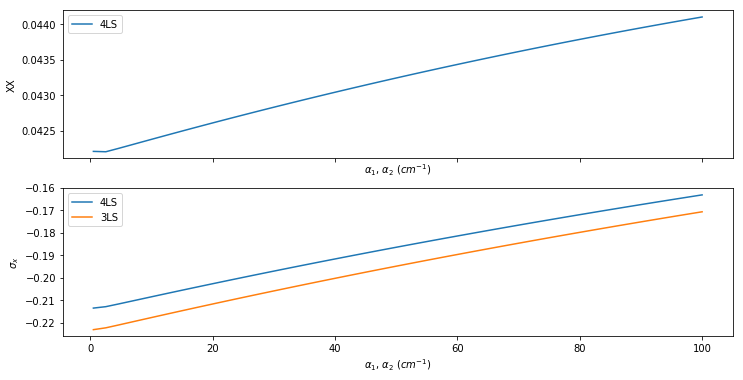

In [53]:
load_and_plot(2)

# Low $T_{ph}$

Here, the dark state population is always a constant difference. GS and BS populations increase slightly slower in 4LS, as they feed population into XX.

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


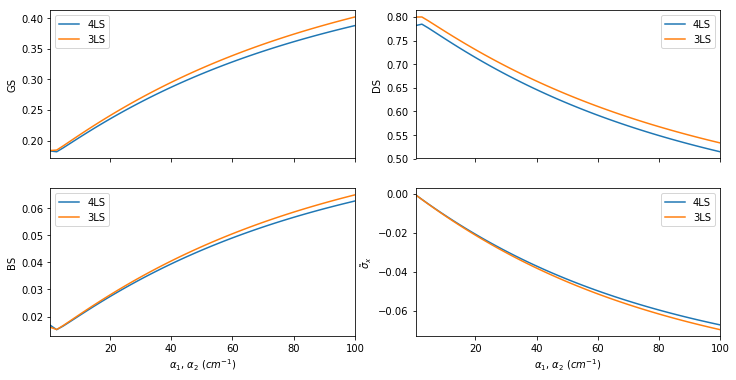

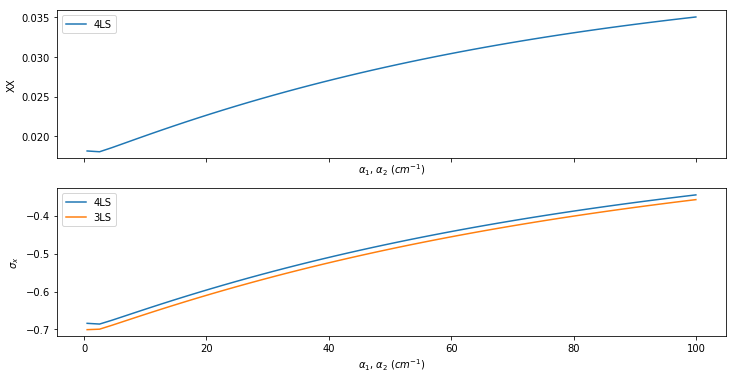

In [48]:
load_and_plot(3)

# very high $\omega_0$ (underdamped), but not larger than site energy

Two high frequency underdamped modes are qualitatively very similar, with marginally higher GS population in the lower frequency model. In this case, we see a very clear population of the dark state via the phonons, though I'm unsure exactly why. I suppose because the phonons couple very weakly to the excitonic gap of the system, thus behaving like the WC theory.

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


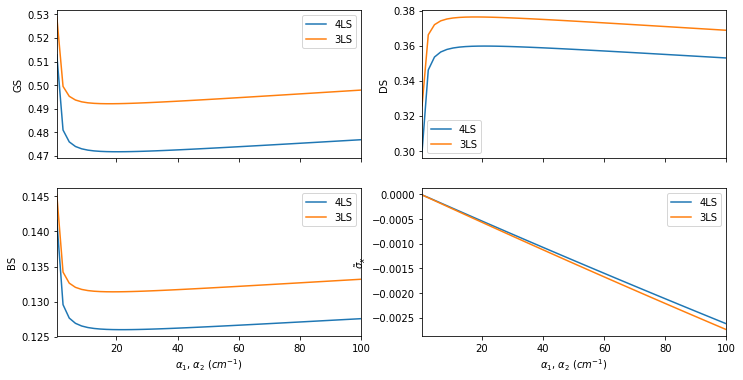

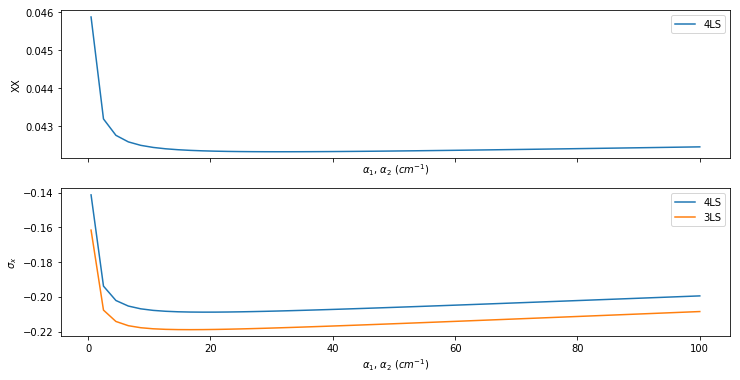

In [49]:
load_and_plot(4)

# very high $\omega_0$ (underdamped), LARGER than site energies (6)

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


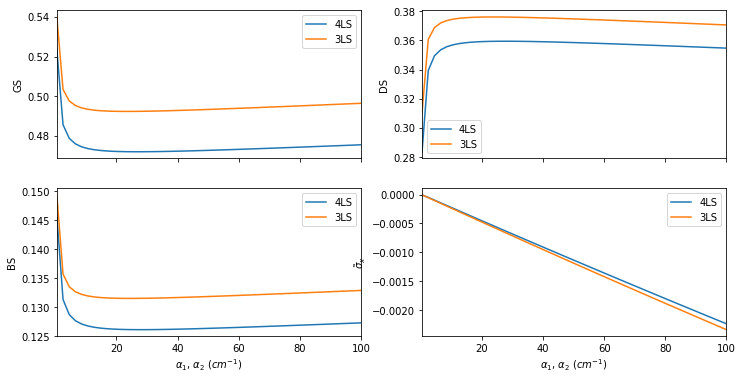

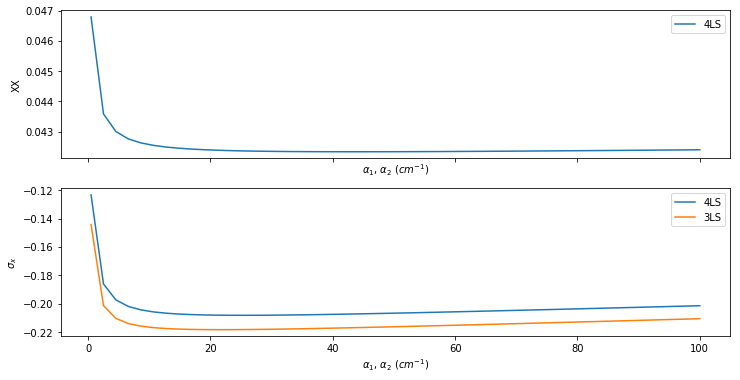

In [51]:
load_and_plot(6)

# very high $\omega_0$ (overdamped), but not larger than site energy

The two overdamped cases are identical, which means that the non-RWA form treats the overdamped case consistently regardless (is insensitive to $\Omega$). The populations and coherences are qualitatively similar between system sizes, with just constant differences between the populations and size energies. Exciton coherences are incredible similar, with minor difference in gradient (possibly caused by convergence issues).

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


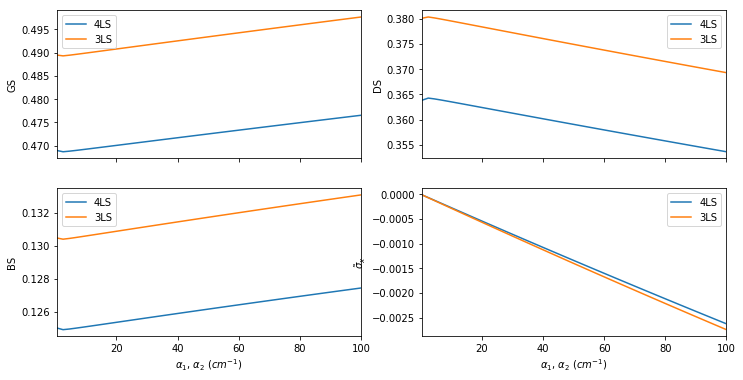

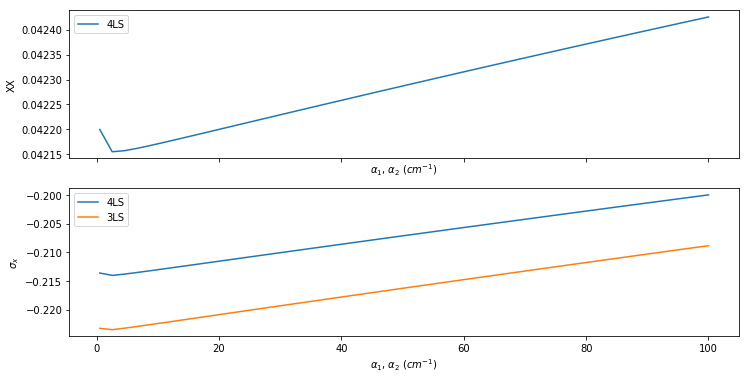

In [50]:
load_and_plot(5)

# very high $\omega_0$ (overdamped), LARGER than site energies


/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


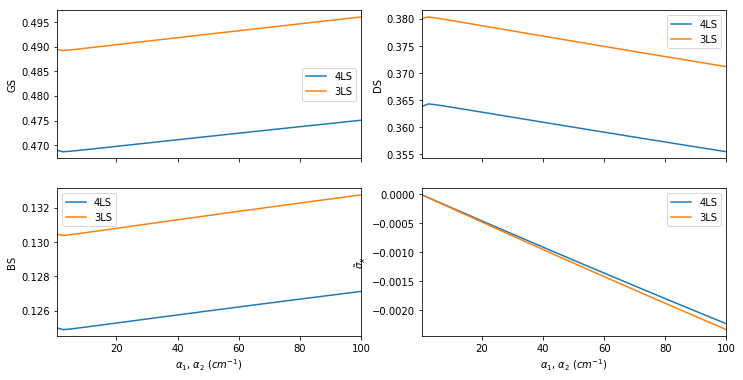

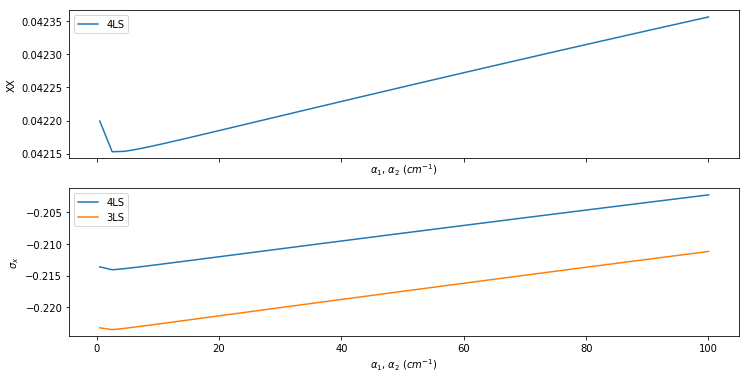

In [52]:
load_and_plot(7)